In [1]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 
from keras.applications.vgg16 import VGG16 
from keras.models import Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [6]:
path = r"../images"
os.chdir(path)

In [7]:
plantas = []

In [8]:
with os.scandir(path) as files:
    for file in files:
        if file.name.endswith('.png'):
            plantas.append(file.name)

In [9]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [10]:
def extract_features(file, model):
    img = load_img(file, target_size=(224,224))
    img = np.array(img) 
    reshaped_img = img.reshape(1,224,224,3) 
    imgx = preprocess_input(reshaped_img)
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [11]:
data = {}
p = r"../02.0-am-clustering.ipynb"

In [12]:
for planta in plantas:
    try:
        feat = extract_features(planta,model)
        data[planta] = feat
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

1/1 [==============================] - 0s 140ms/step


In [ ]:
filenames = np.array(list(data.keys()))

feat = np.array(list(data.values()))

feat = feat.reshape(-1,4096)
unique_labels = [os.path.splitext(file)[0] for file in plantas]

In [ ]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(x)

/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2000, random_state=22)

In [ ]:
groups = {}
matplotlib.rcParams['font.family'] = 'Times New Roman'
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
def view_cluster(cluster, n=20):
    num_rows = int(np.ceil(n / 5))  
    plt.figure(figsize=(25, num_rows * 5)) 
    files = groups[cluster]
    if len(files) > n:
        print(f"Recortando tamaño del clúster de {len(files)} a {n}")
        files = files[:n]
    for index, file in enumerate(files):
        plt.subplot(num_rows, 5, index + 1) 
        img = load_img(file)
        img = np.array(img)
        if img.shape[1] > 400:  
            new_file = find_smaller_image(cluster, file)
            img = load_img(new_file)
            img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

def find_smaller_image(cluster, current_file):
    cluster_files = groups[cluster]
    for file in cluster_files:
        if file != current_file:  
            img = load_img(file)
            img = np.array(img)
            if img.shape[1] <= 400:  
                return file
    return current_file 

In [ ]:
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

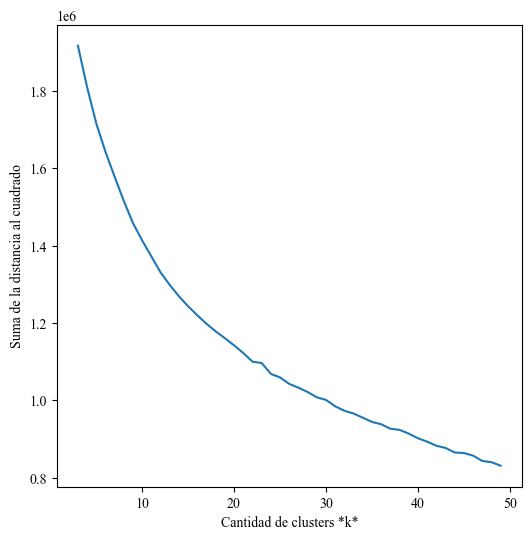

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('Suma de la distancia al cuadrado');

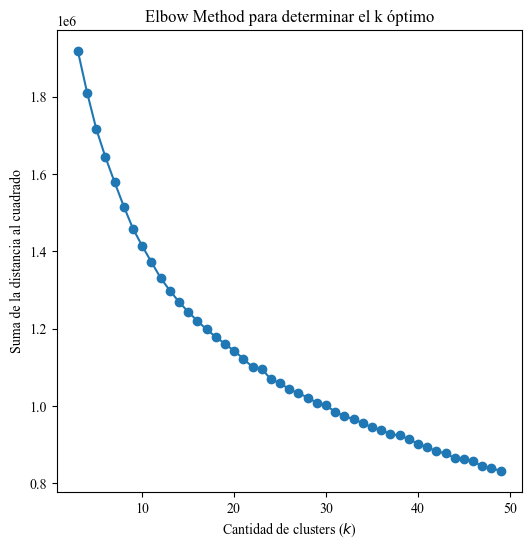

In [ ]:
unique_labels_with_clusters = list(zip(unique_labels, kmeans.labels_))

df_clusters = pd.DataFrame(unique_labels_with_clusters, columns=['label', 'cluster'])

df_clusters.to_csv('./labels_clusters.csv', index=False)

sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22, n_init=10)
    km.fit(x)
    
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, marker='o')
plt.xlabel(r'Cantidad de clusters ($k$)')
plt.ylabel('Suma de la distancia al cuadrado')
plt.title('Elbow Method para determinar el k óptimo')
plt.show()

In [ ]:
num_clusters = 7 # Cantidad óptima de clústeres
kmeans = KMeans(n_clusters=num_clusters, random_state=22)
kmeans.fit(x)

df_clusters = pd.DataFrame({'label': unique_labels, 'cluster': kmeans.labels_})
df_clusters.to_csv('/Users/azulmakk/Universidad/Proyecto Final/label_cluster.csv', index=False)

/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


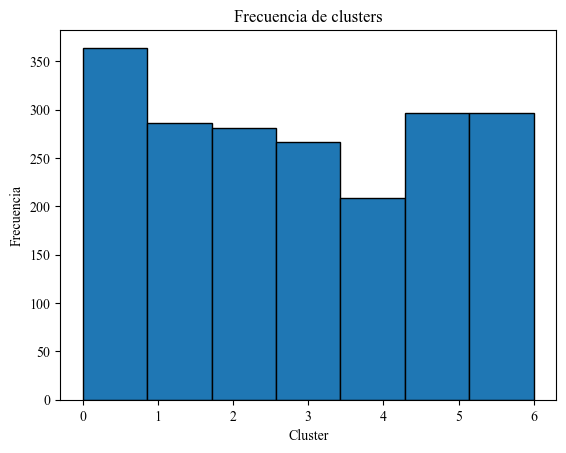

In [ ]:
plt.hist(kmeans.labels_, bins=num_clusters, edgecolor='black', align='mid')
plt.xlabel('Cluster')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de clusters')
plt.xticks(range(num_clusters))
plt.show()

In [ ]:
groups = {}
for file, cluster in zip(filenames, kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
    groups[cluster].append(file)


Recortando tamaño del clúster de 364 a 20


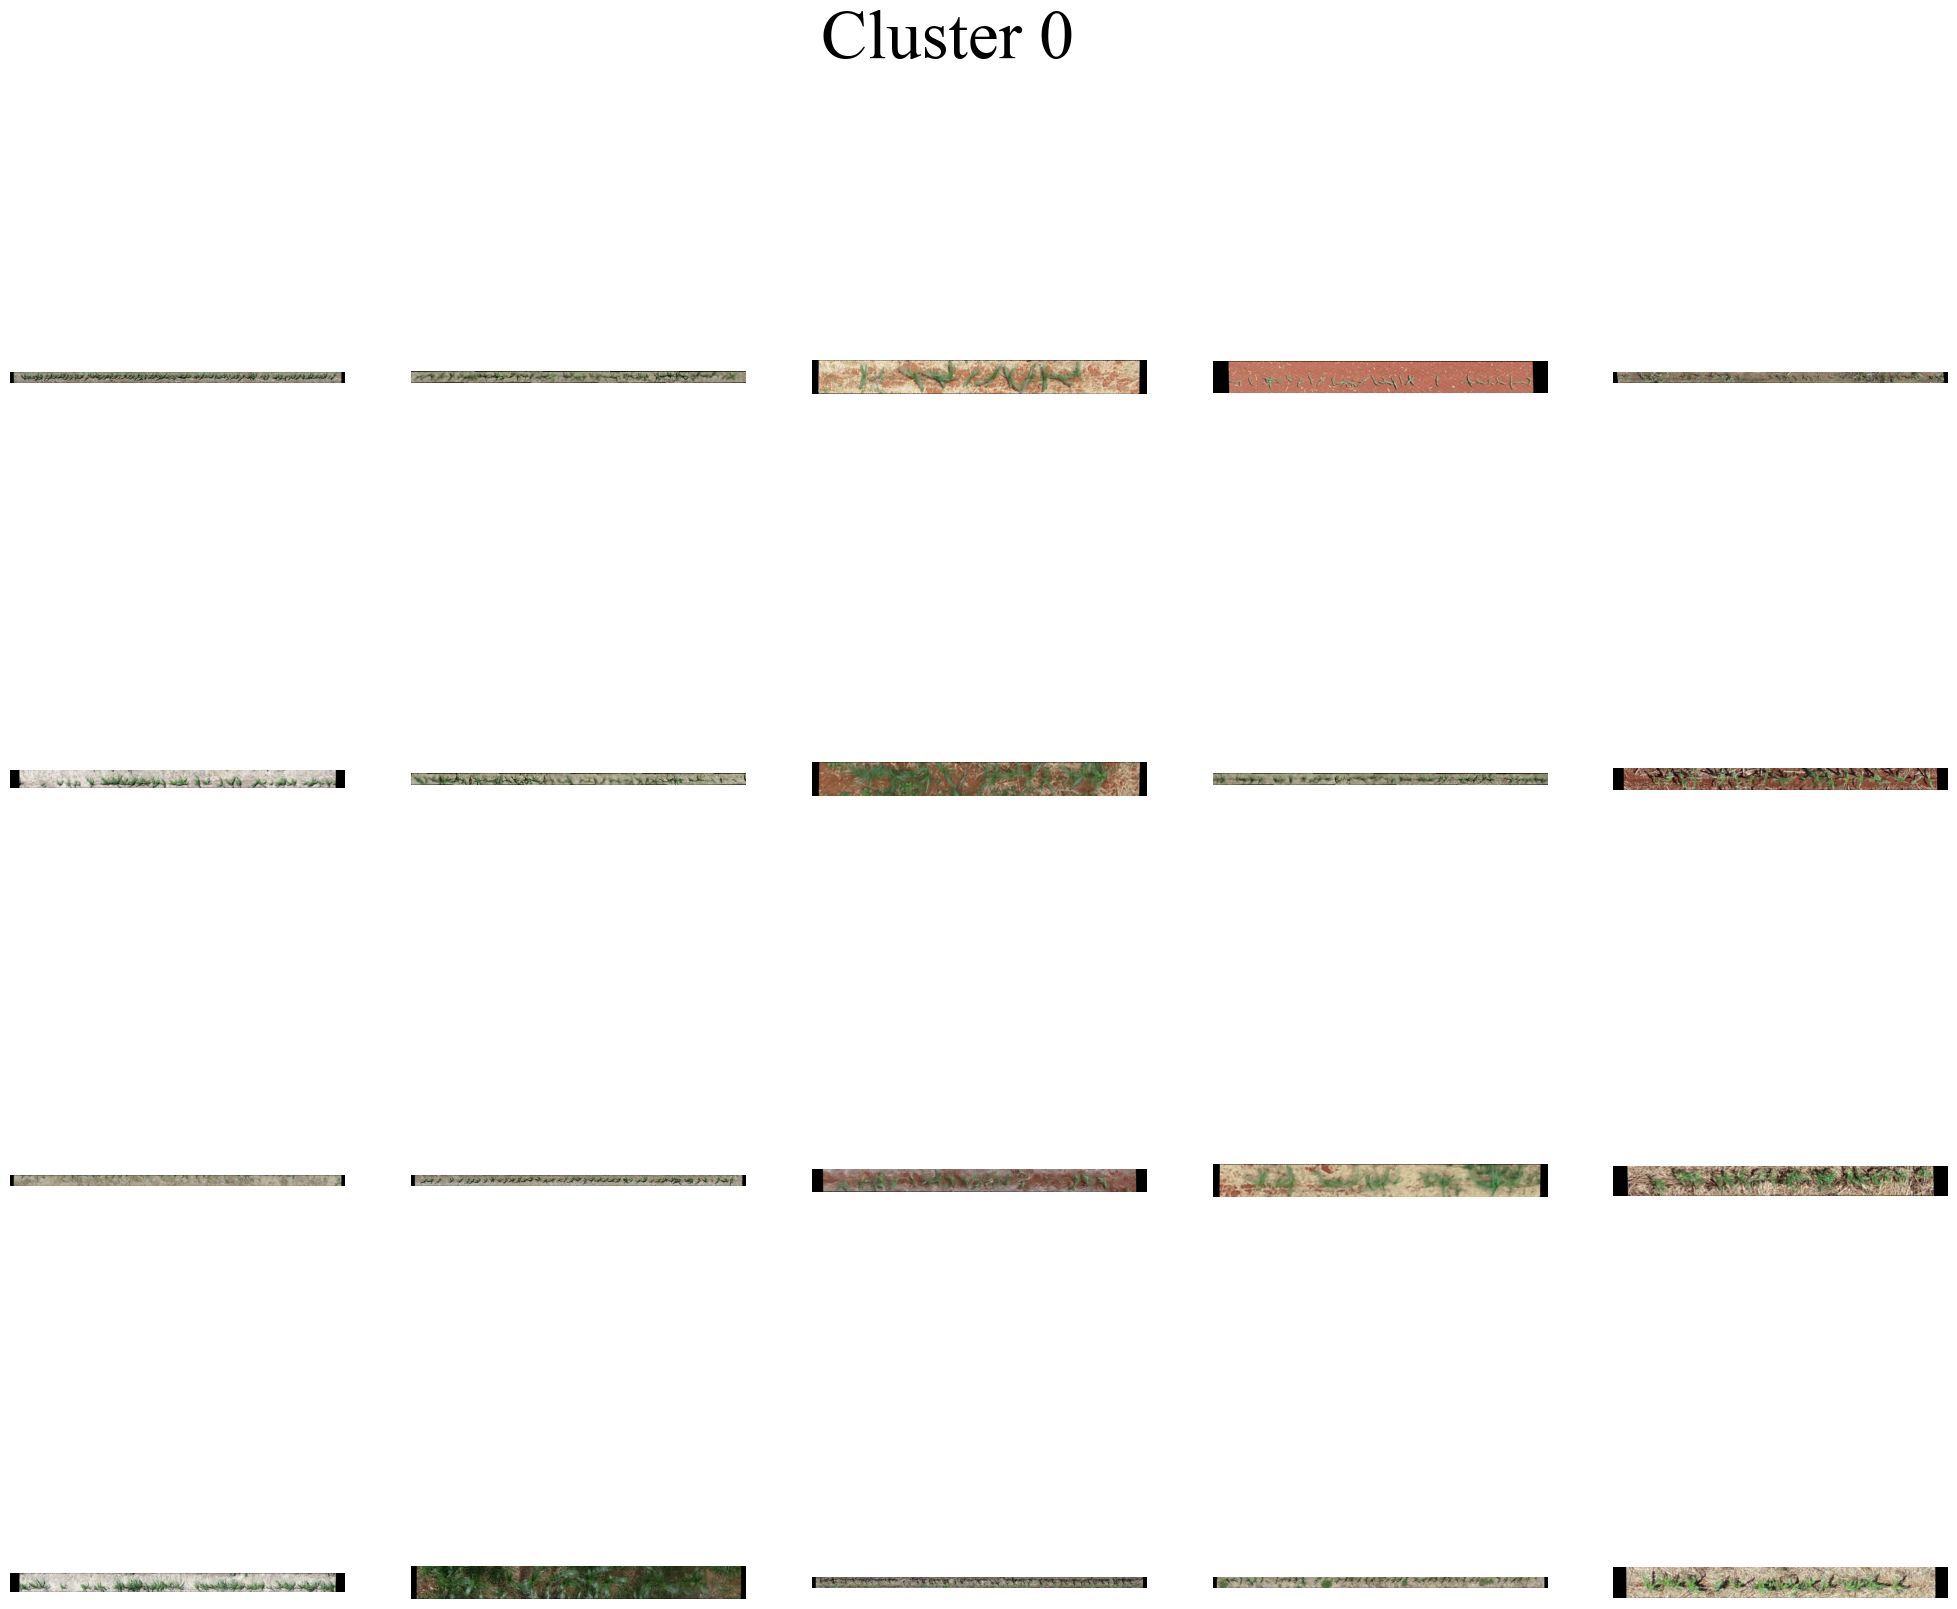

Recortando tamaño del clúster de 286 a 20


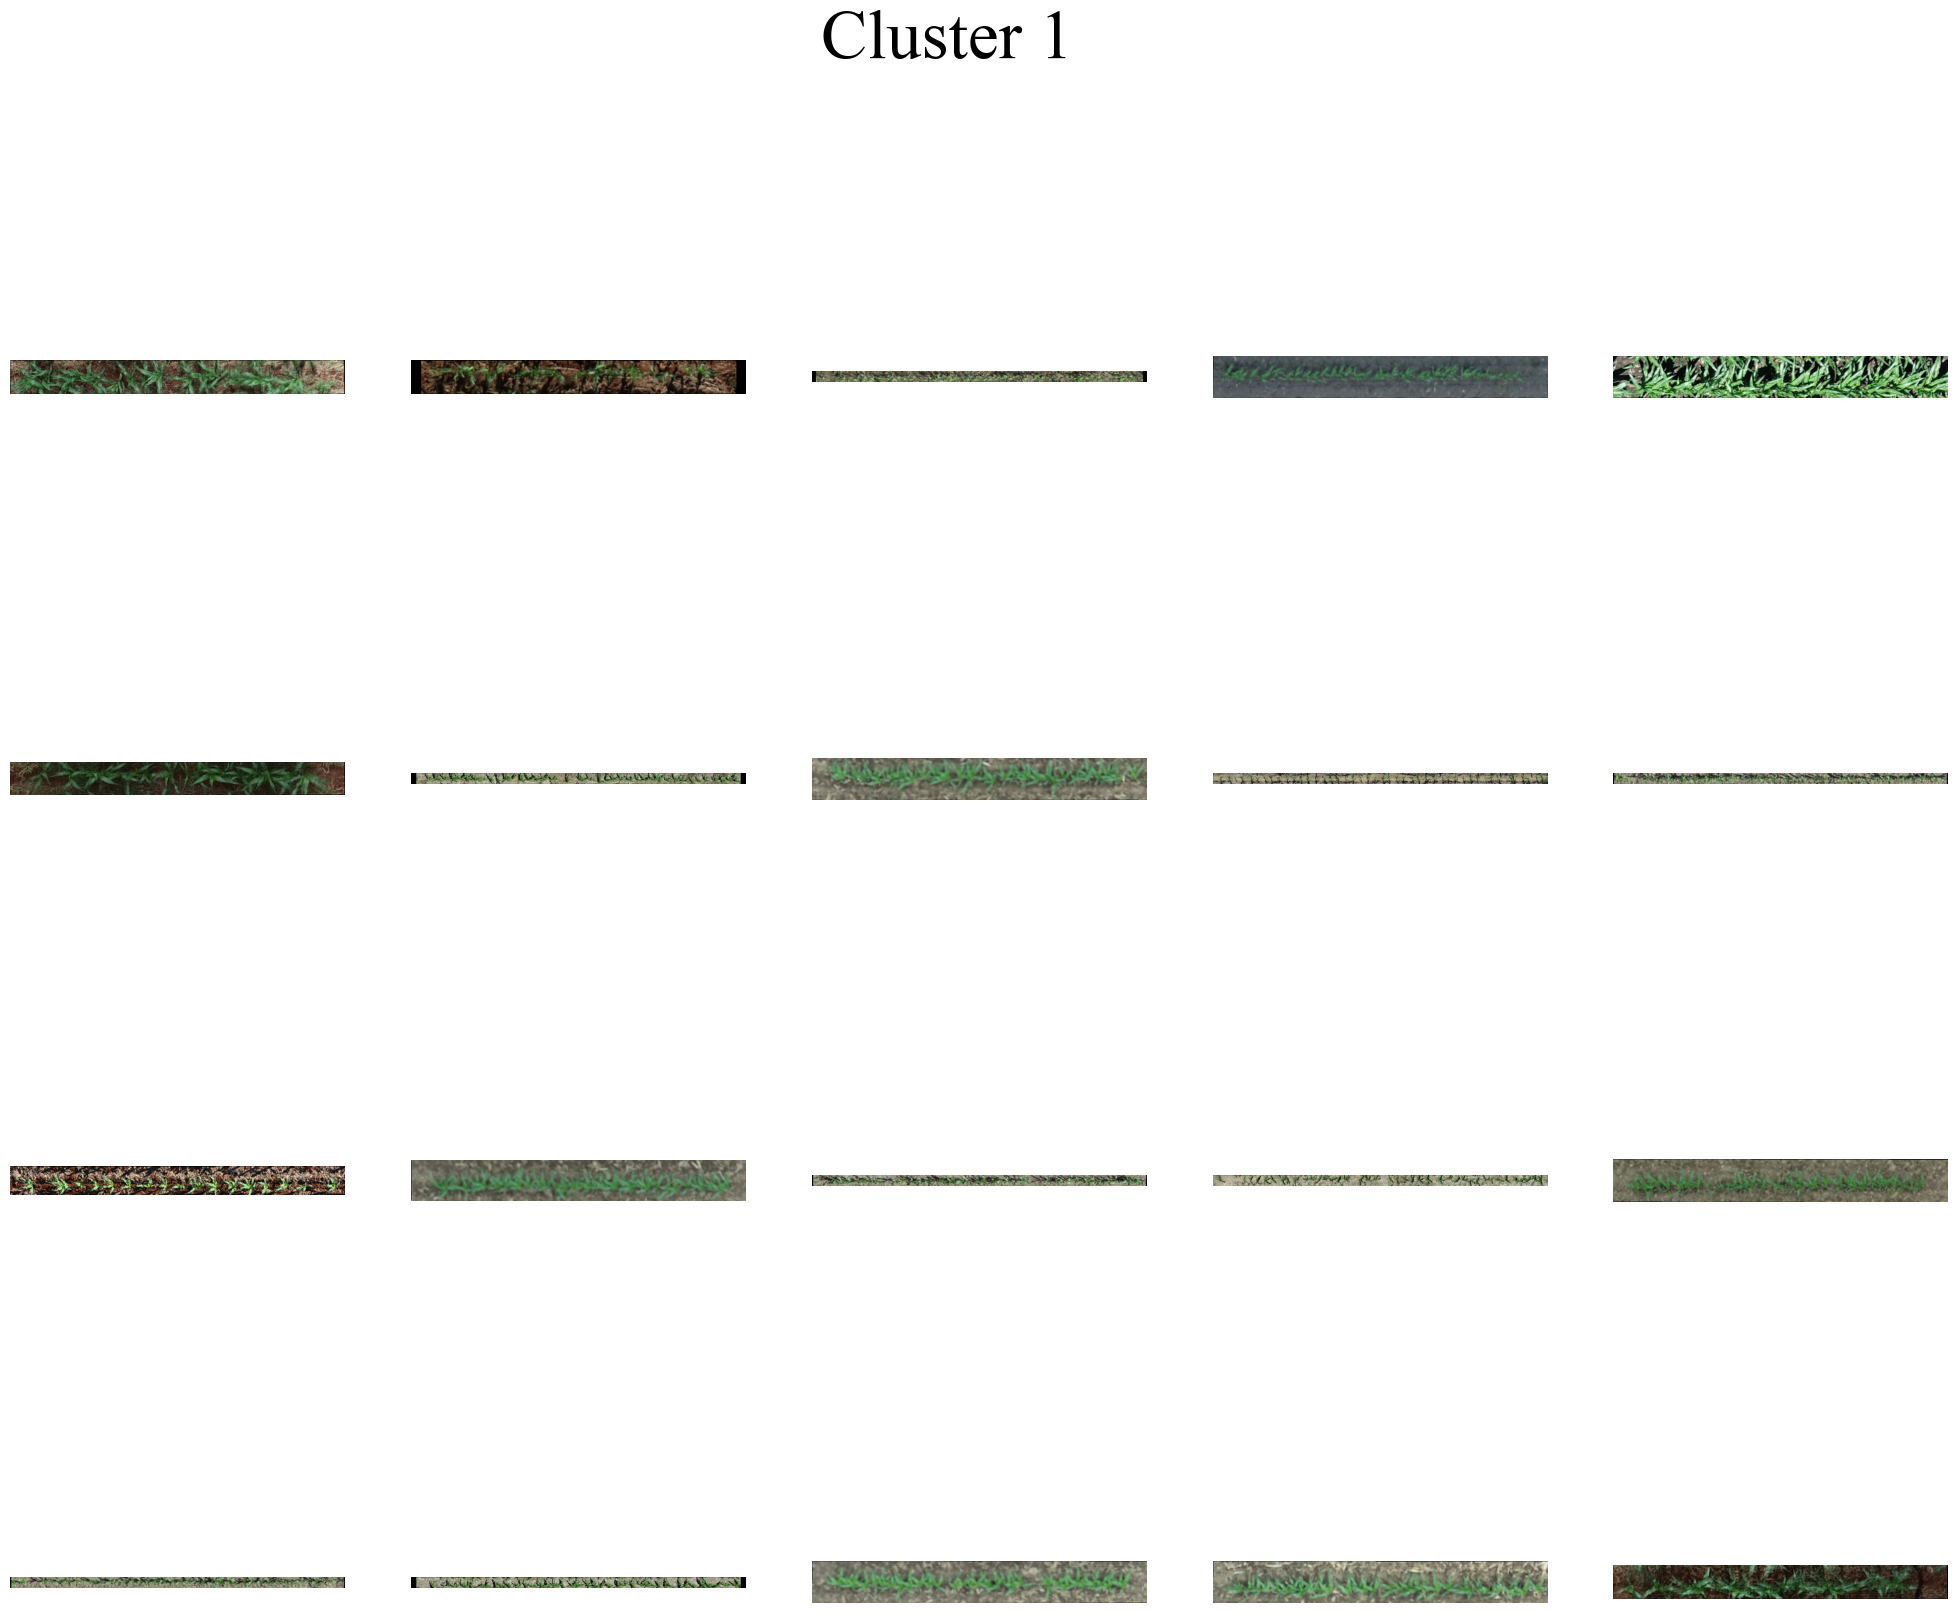

Recortando tamaño del clúster de 281 a 20


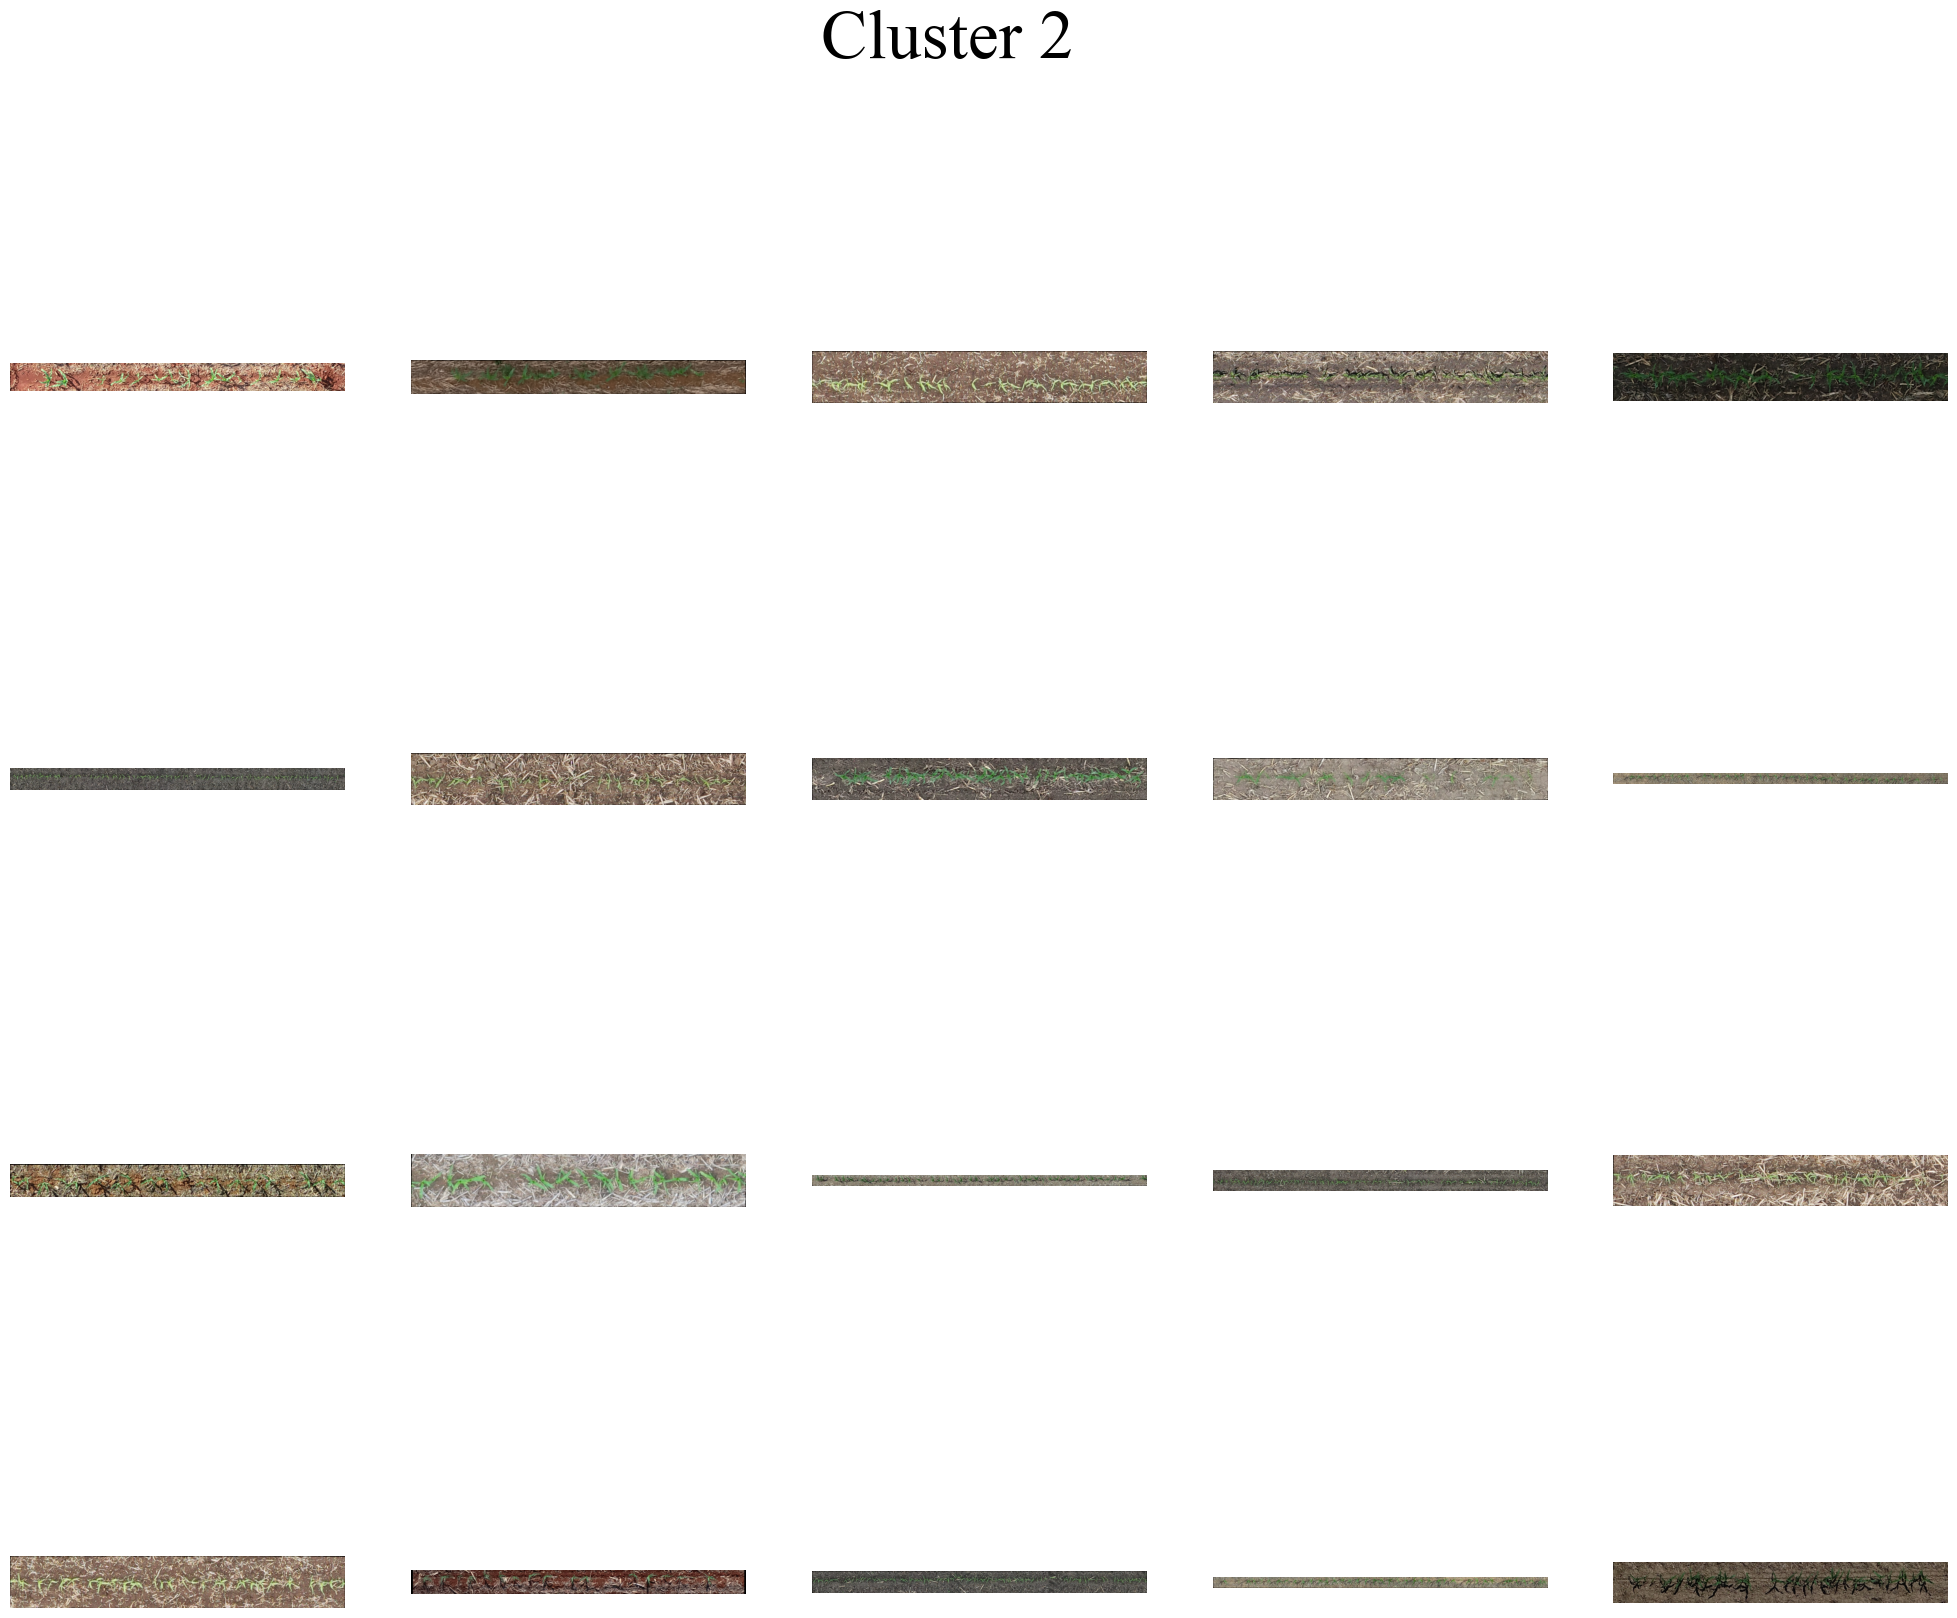

Recortando tamaño del clúster de 267 a 20


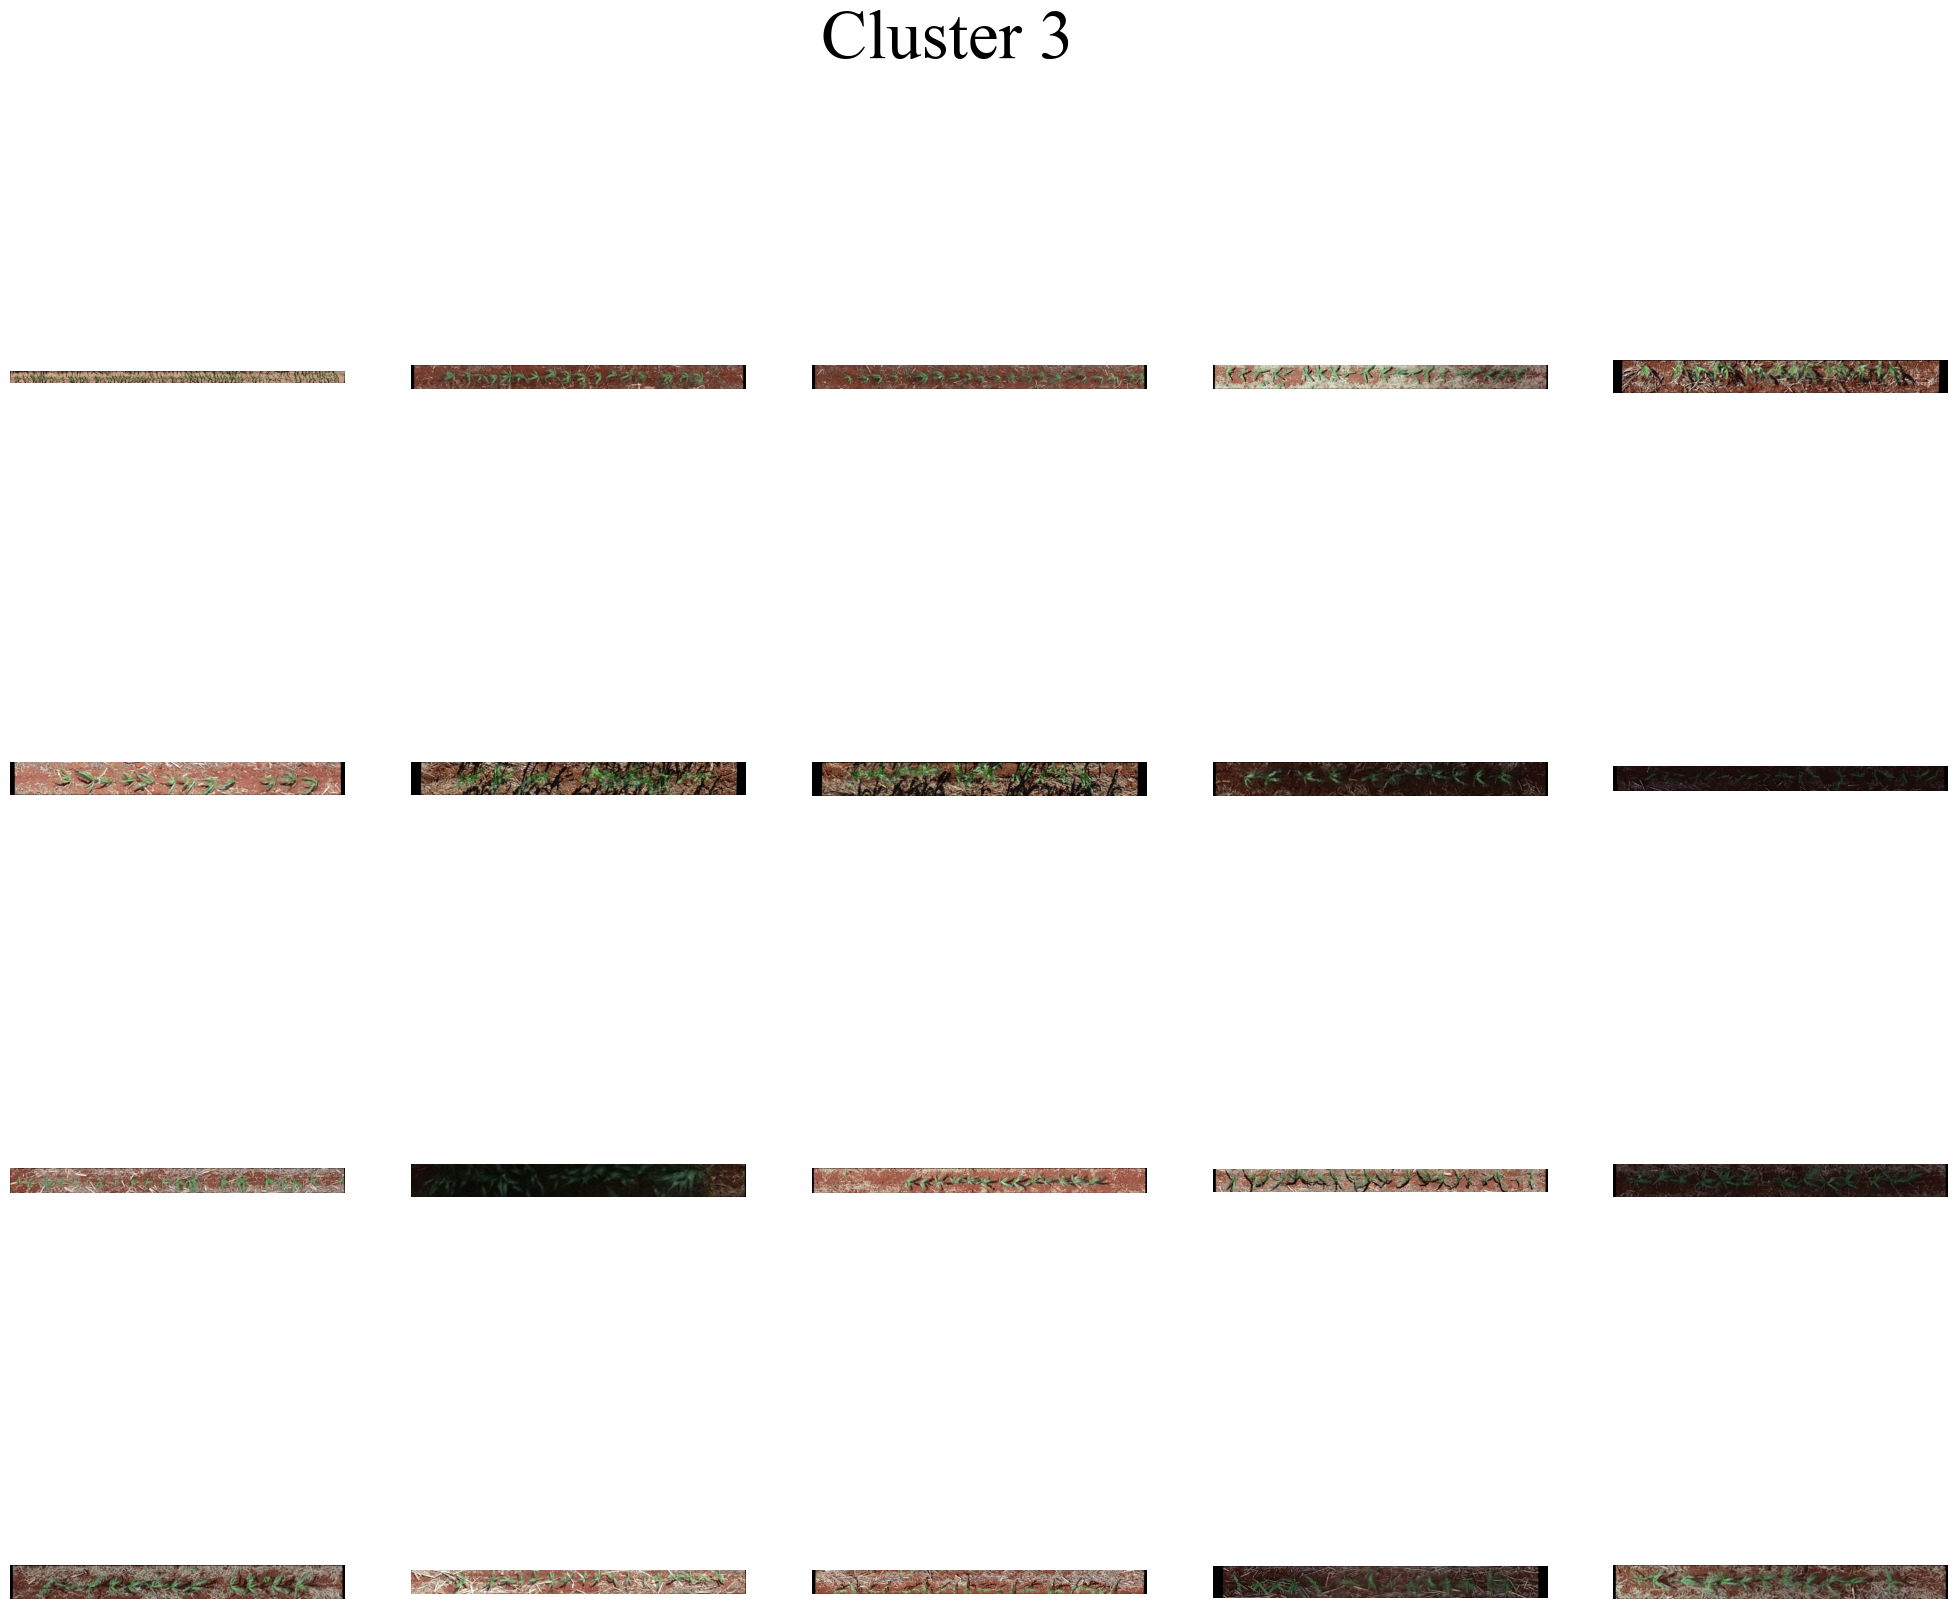

Recortando tamaño del clúster de 209 a 20


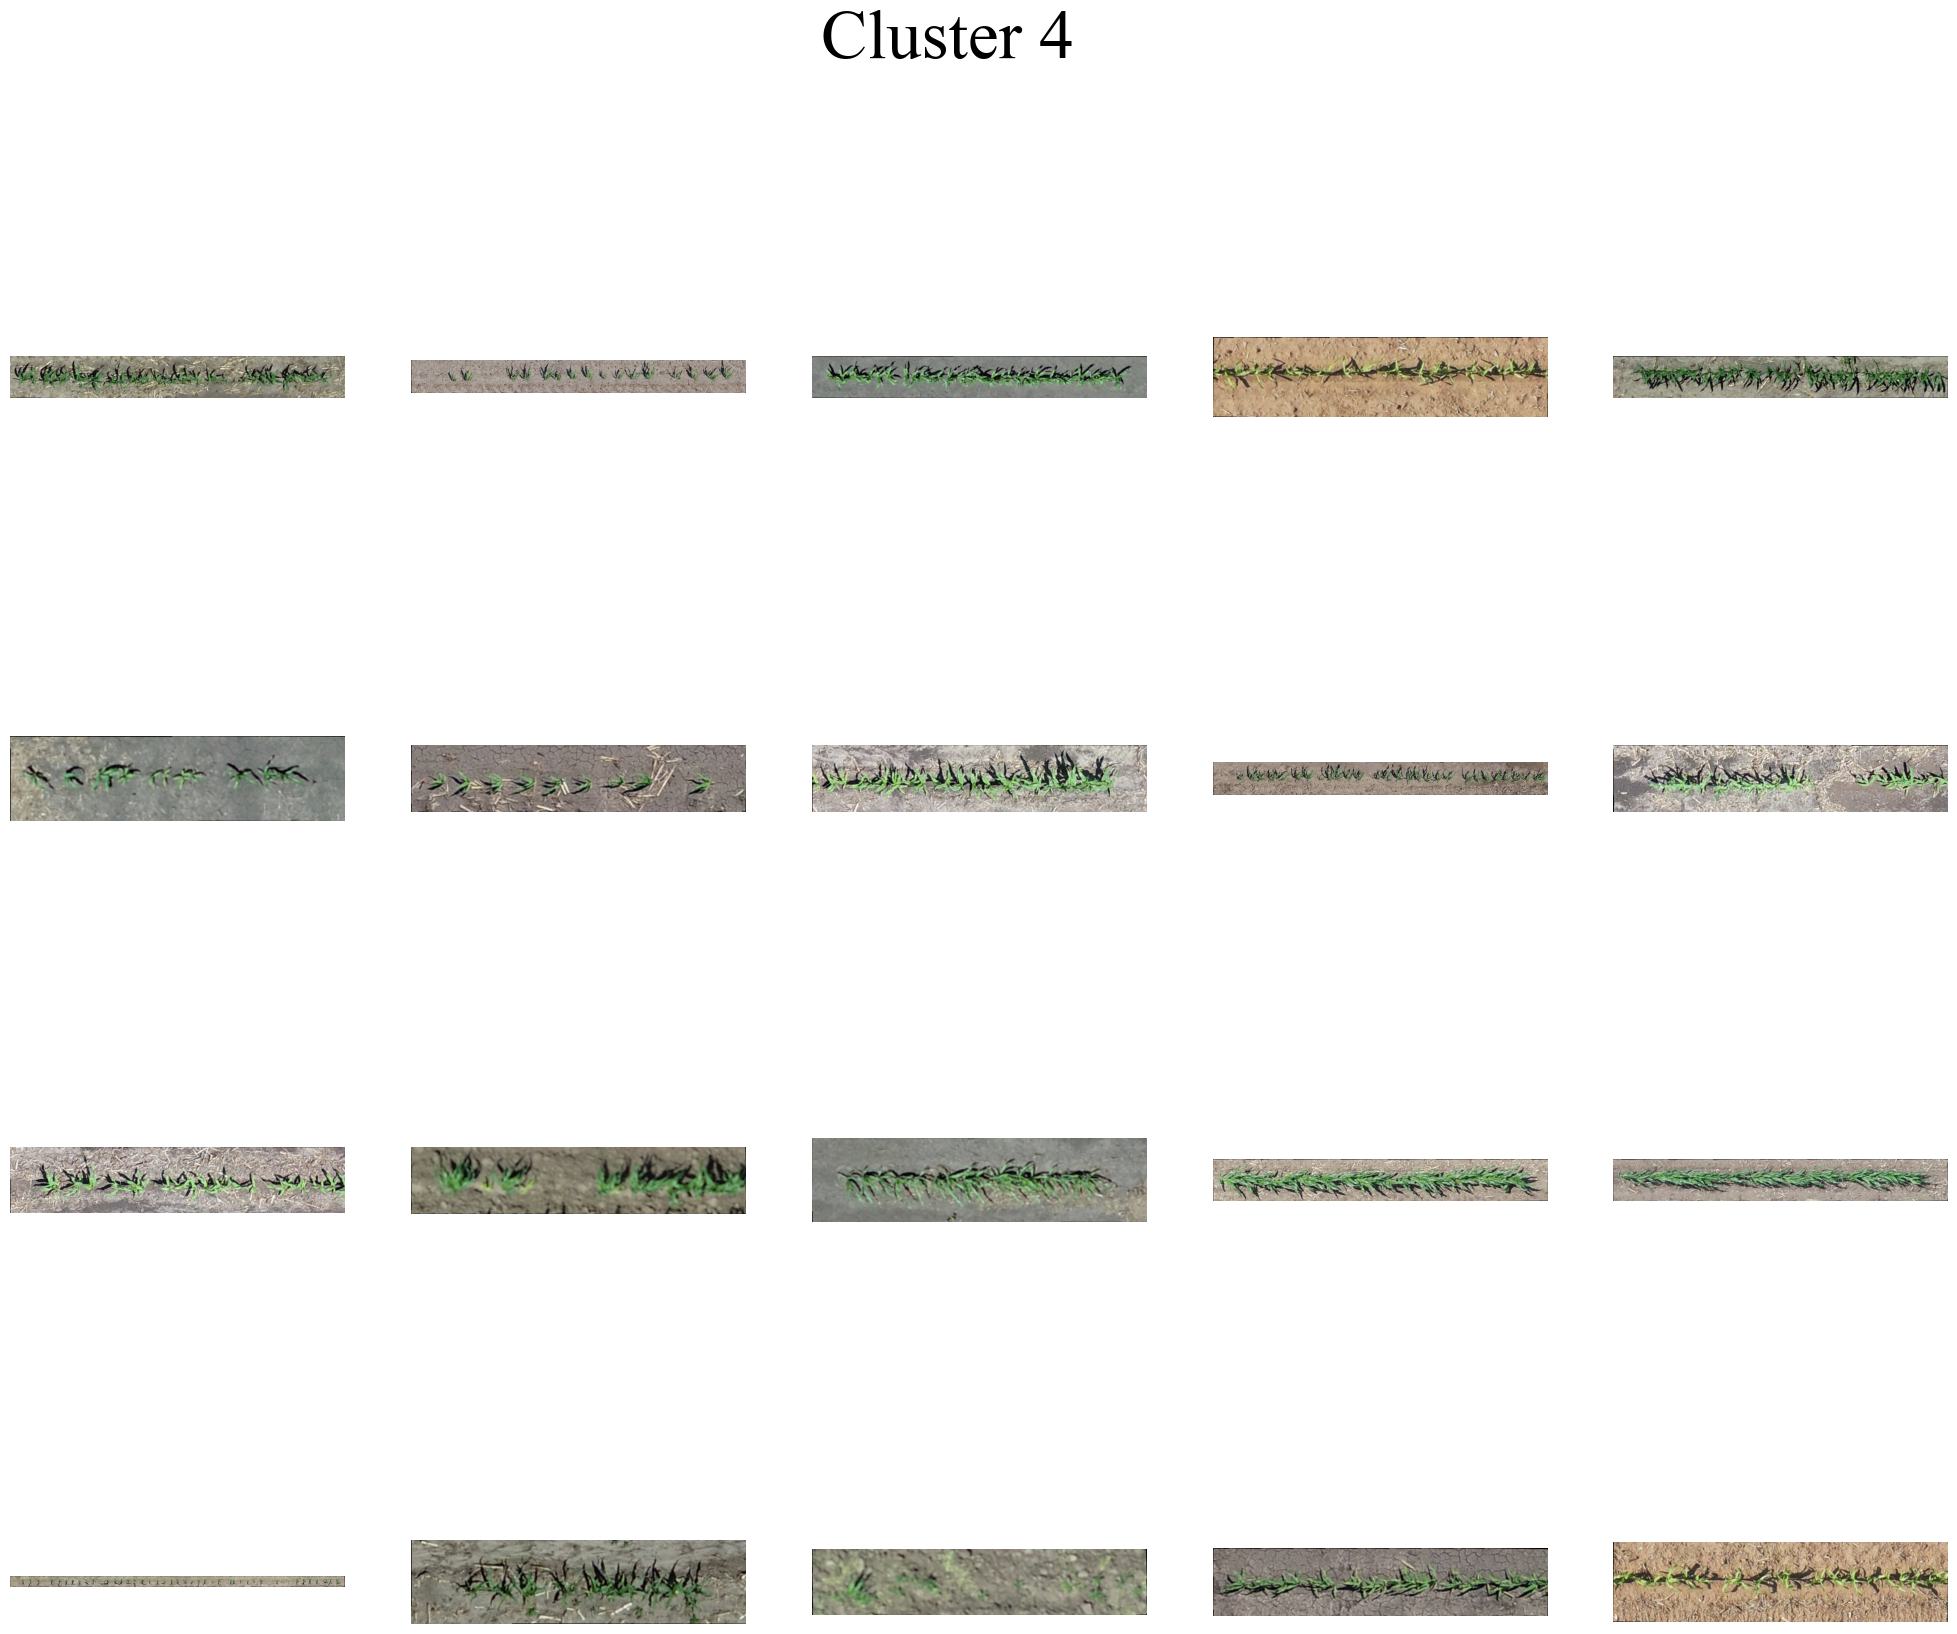

Recortando tamaño del clúster de 296 a 20


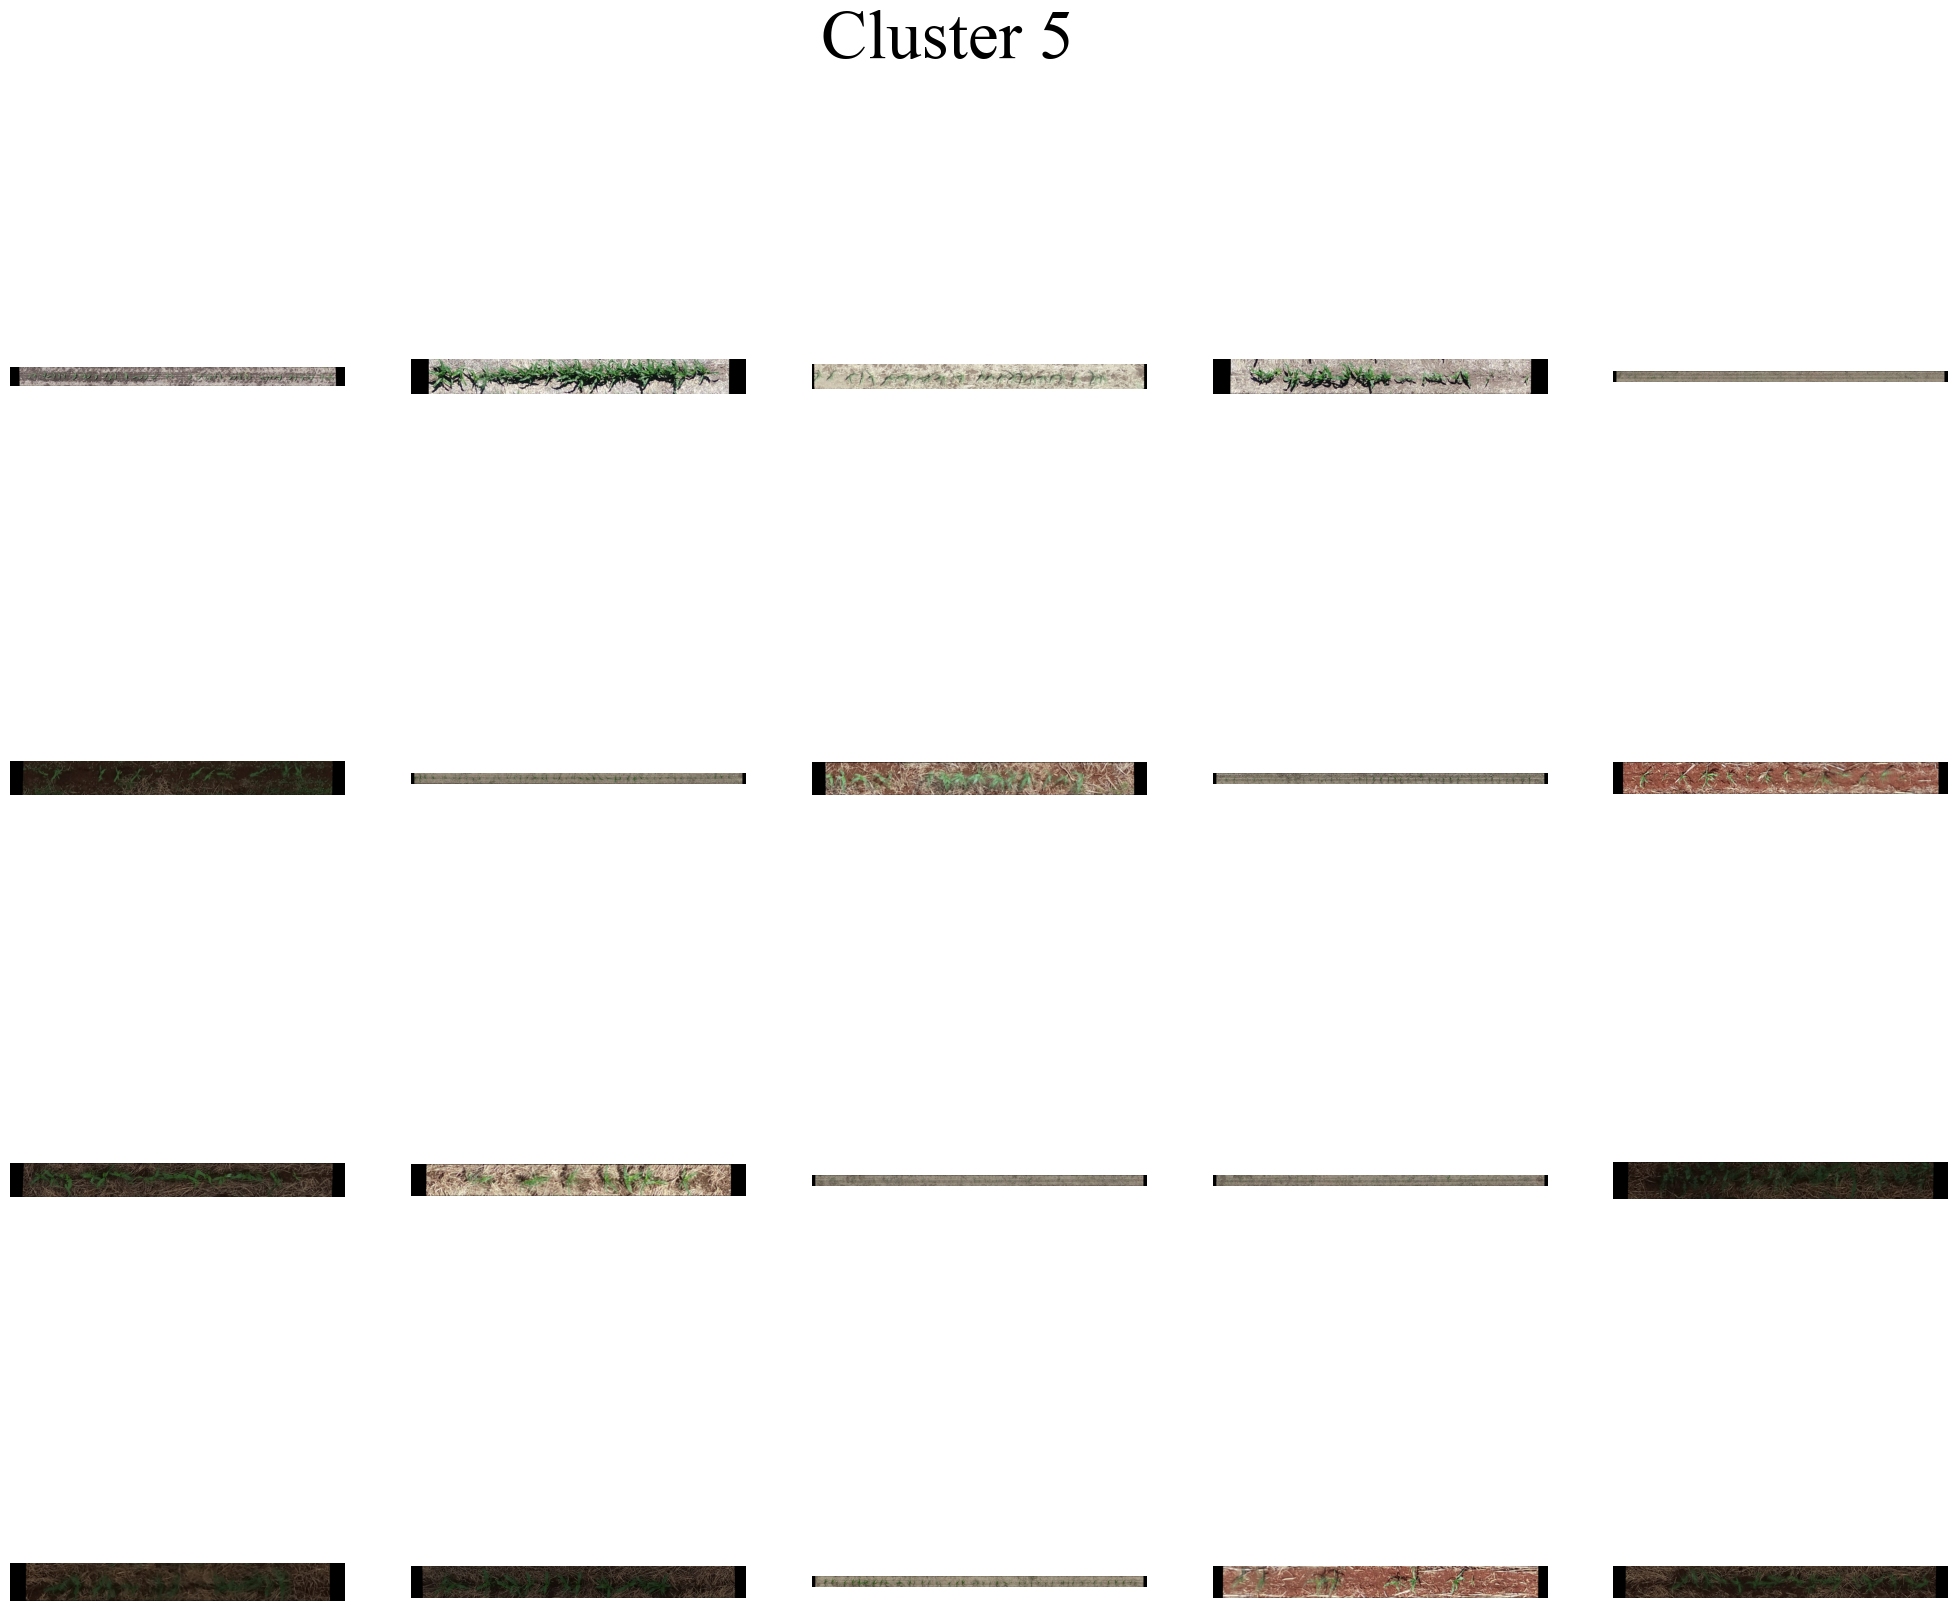

Recortando tamaño del clúster de 297 a 20


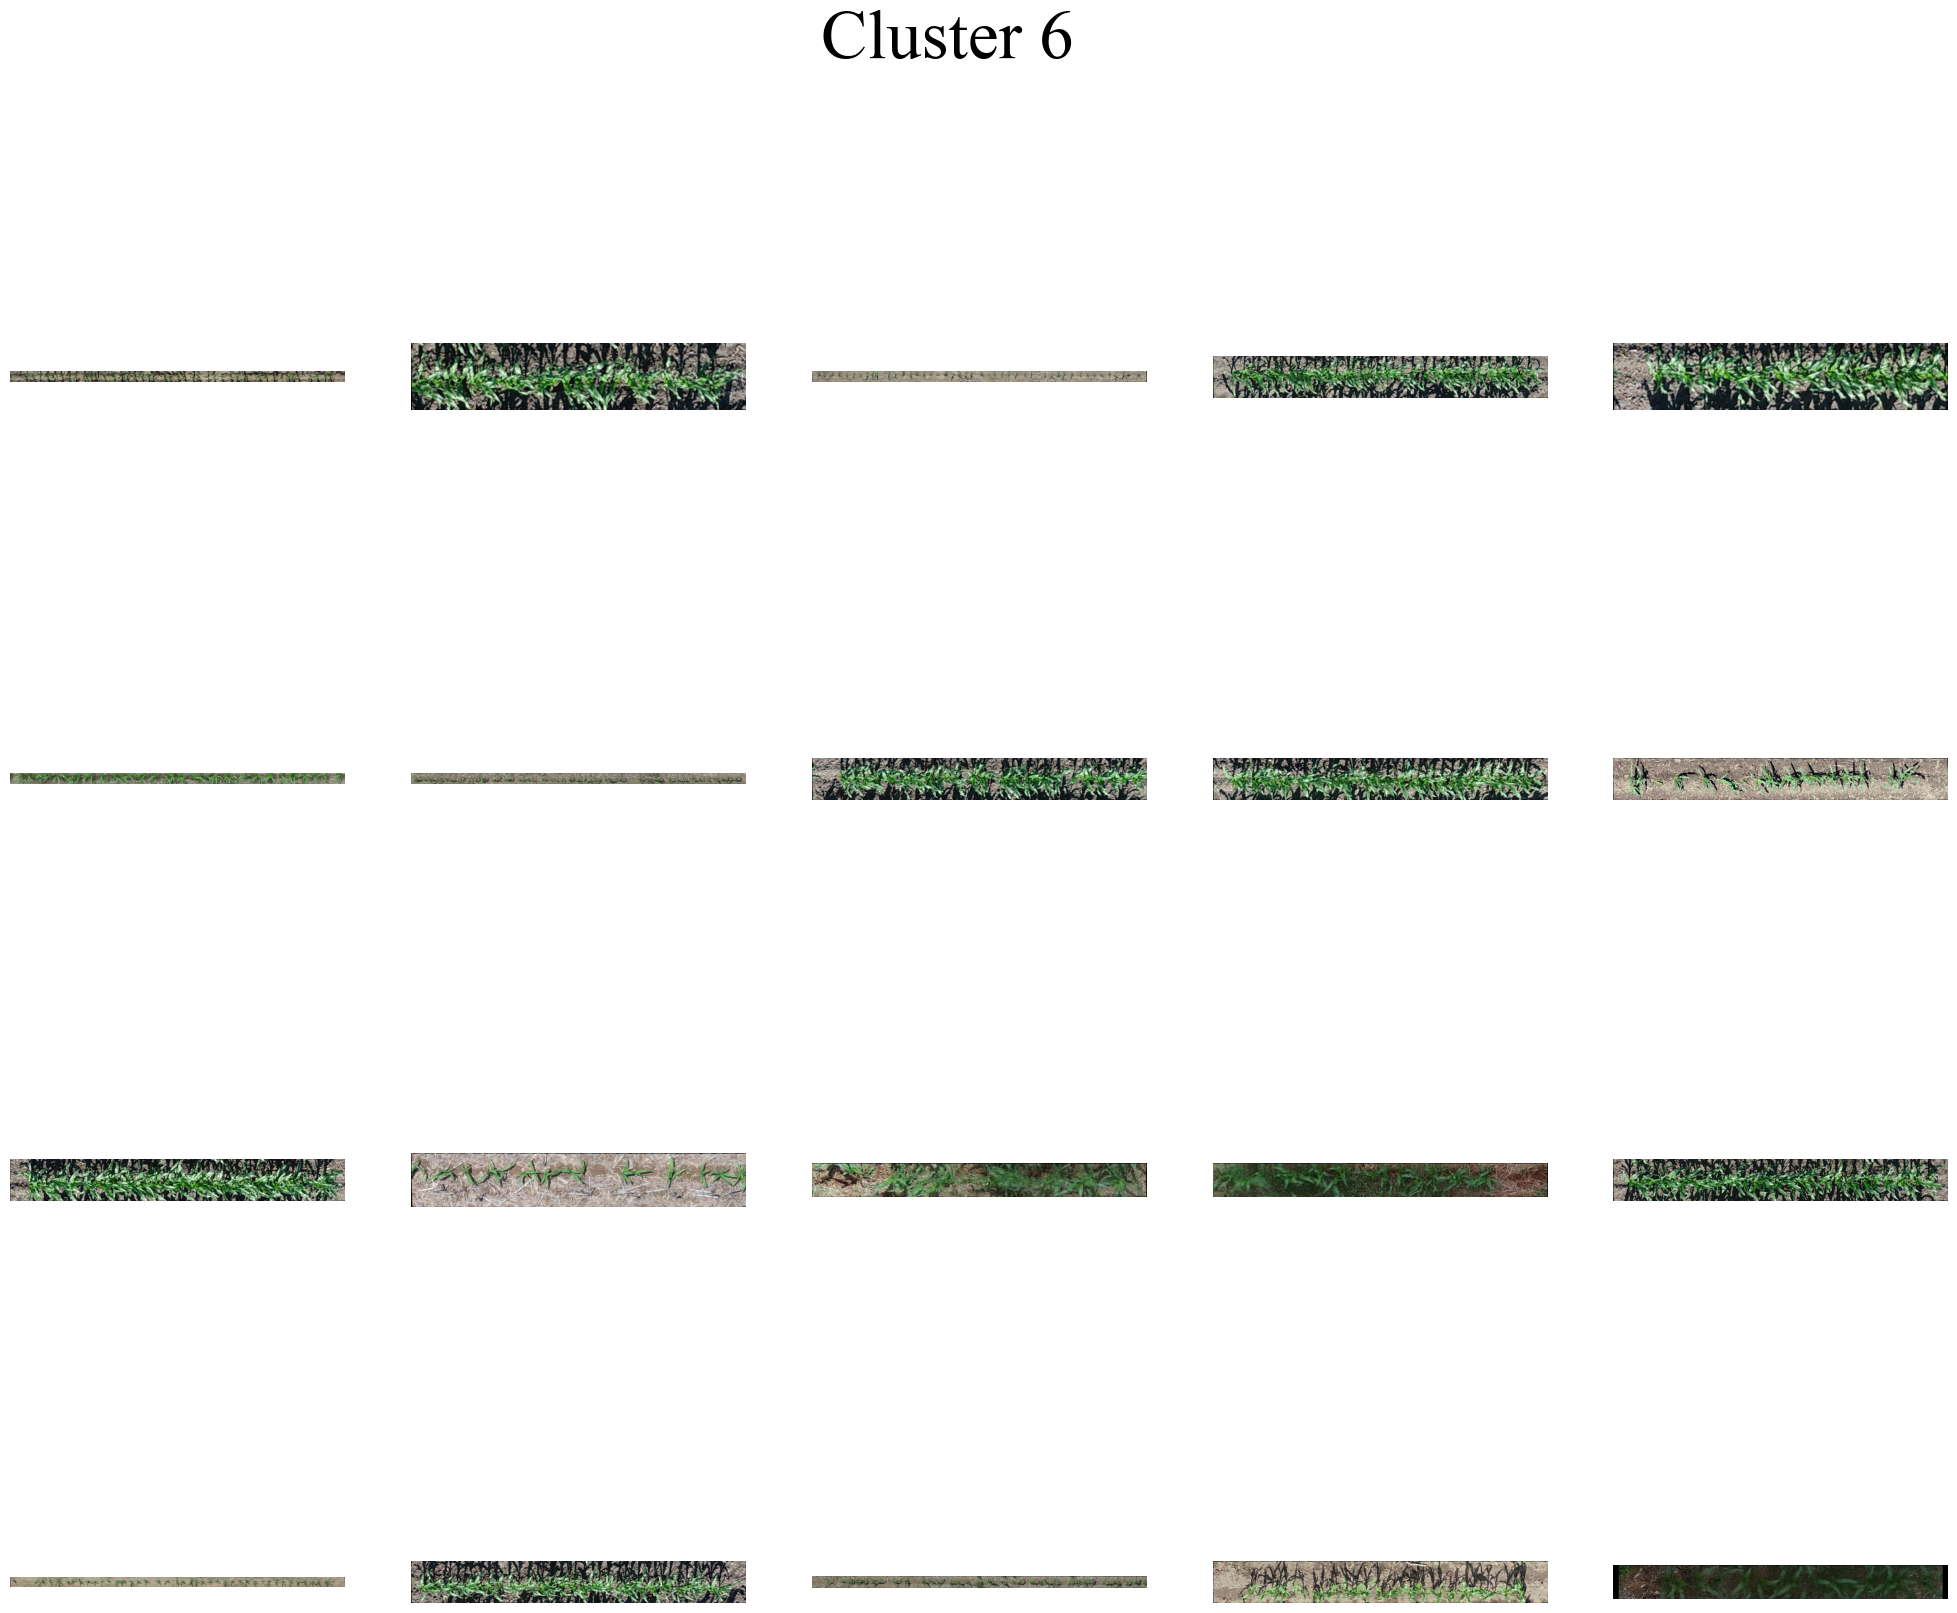

In [ ]:
for cluster in range(num_clusters):
    view_cluster(cluster)
    plt.suptitle(f'Cluster {cluster}', fontsize=50)
    plt.show()

# Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(x, kmeans.labels_)
print("Índice de Silueta promedio:", silhouette_avg)

Índice de Silueta promedio: 0.115659334


El valor del índice de silueta varía entre -1 y 1. Un valor cercano a 1 indica que los clústeres están bien separados, mientras que un valor cercano a -1 indica que los clústeres están muy superpuestos. Un valor cercano a 0 indica que hay clústeres superpuestos o que están muy cerca uno del otro.

En este caso, el índice de silueta promedio es 0.115659334. Esto sugiere que los clústeres no están muy bien separados, pero tampoco están demasiado superpuestos. Los clústeres tienen cierto grado de separación, pero todavía hay cierta superposición entre ellos. En general, el valor del índice de silueta promedio indica que la estructura de clústeres en el conjunto de datos no es muy clara, y podría haber margen para mejorar la separación de los clústeres mediante ajustes en el algoritmo de agrupamiento o en los datos de entrada.

# Inercia

/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

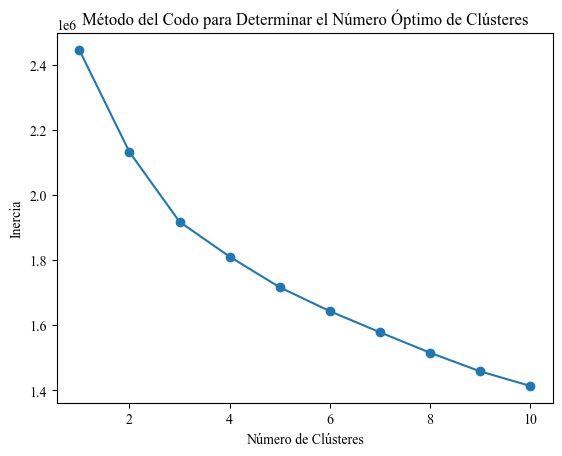

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=22)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clústeres')
plt.show()

# Centroides

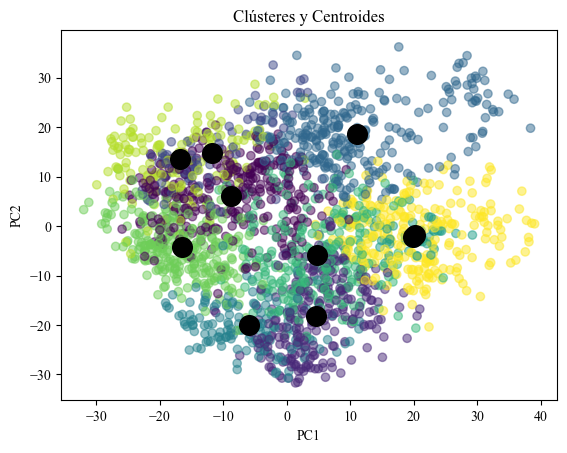

In [ ]:
centroids = kmeans.cluster_centers_

plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='black', s=200, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clústeres y Centroides')
plt.show()

/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azulmakk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


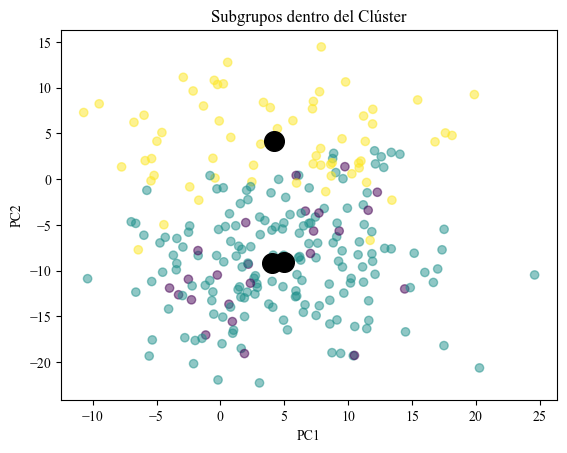

In [ ]:
subcluster_labels = KMeans(n_clusters=3, random_state=42).fit_predict(x[kmeans.labels_ == cluster])
subcluster_centers = KMeans(n_clusters=3, random_state=42).fit(x[kmeans.labels_ == cluster]).cluster_centers_

plt.scatter(x[kmeans.labels_ == cluster, 0], x[kmeans.labels_ == cluster, 1], c=subcluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(subcluster_centers[:, 0], subcluster_centers[:, 1], marker='o', c='black', s=200, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Subgrupos dentro del Clúster')
plt.show()

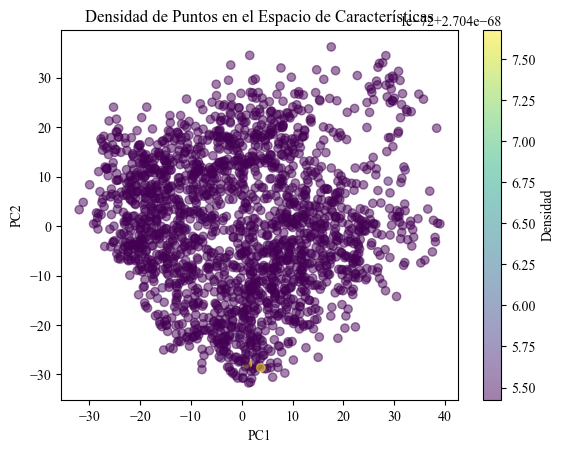

In [ ]:
from scipy.stats import gaussian_kde

# Estimación de la densidad de puntos en el espacio de características
kde = gaussian_kde(x.T)
density = kde(x.T)

# Visualización de la densidad
plt.scatter(x[:, 0], x[:, 1], c=density, cmap='viridis', alpha=0.5)
plt.colorbar(label='Densidad')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Densidad de Puntos en el Espacio de Características')
plt.show()
